In [2]:
# logistic regression for new clusters 0-6
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import csv
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

Features:

1. Age | Objective Feature | age | int (days)
2. Height | Objective Feature | height | int (cm) |
3. Weight | Objective Feature | weight | float (kg) |
4. Gender | Objective Feature | gender | categorical code |
5 .Systolic blood pressure | Examination Feature | ap_hi | int |
6. Diastolic blood pressure | Examination Feature | ap_lo | int |
7. Cholesterol | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal |
8. Glucose | Examination Feature | gluc | 1: normal, 2: above normal, 3: well above normal |
9. Smoking | Subjective Feature | smoke | binary |
10. Alcohol intake | Subjective Feature | alco | binary |
11. Physical activity | Subjective Feature | active | binary |
12. Presence or absence of cardiovascular disease | Target Variable | cardio | binary |

In [9]:
df = pd.read_csv("../Data/New Clusters/Cluster0", delimiter=',')
# df.rename(columns={"Unnamed: 0": "original_id"},inplace=True)
df = df.iloc[:,2:] # drop original/new ids
X = df.iloc[:,:-1] # everything but last column
y = df.iloc[:,-1] #last column


In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
# standardize: mean = 0, std = 1
scaler = StandardScaler()
scaled_features = scaler.fit_transform(X)
pd.DataFrame(scaled_features).head()

,0,1,2,3,4,5,6,7,8,9,10
0,-0.200950,-0.63983,-1.040849,0.567811,0.157496,0.545414,0.894828,0.0,-0.313748,-0.27282,0.467302
1,-0.913630,-0.63983,0.279939,-1.064052,-0.117673,-1.421731,0.894828,0.0,-0.313748,-0.27282,-2.139945
2,0.778920,-0.63983,-0.894095,1.189473,-0.117673,-0.438158,0.894828,0.0,-0.313748,-0.27282,0.467302
3,-2.082716,-0.63983,1.013711,-0.753221,0.432664,0.545414,0.894828,0.0,-0.313748,-0.27282,0.467302
4,-1.207851,-0.63983,-1.187603,2.121966,-0.392841,-0.438158,0.894828,0.0,-0.313748,-0.27282,0.467302


In [12]:
import sklearn
X_train, X_test, y_train, y_test = train_test_split(X, y)
# clf = LogisticRegression().fit(X_train, y_train)
clf = sklearn.linear_model.SGDClassifier(loss="log").fit(X_train, y_train)
y_pred = clf.predict(X_test)
metrics.accuracy_score(y_test,y_pred)

0.26621160409556316

In [13]:
# SMOTE
# https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8
from imblearn.over_sampling import SMOTE
os = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
os_data_X, os_data_y=os.fit_resample(X_train, y_train)
# we can Check the numbers of our data
print("Length of oversampled data:",len(os_data_X))
print("Number of no subscription in oversampled data",len(os_data_y==0))
print("Number of subscription",len(os_data_y[os_data_y==1]))
print("Proportion of no subscription data in oversampled data is ",len(os_data_y[os_data_y==0])/len(os_data_X))
print("Proportion of subscription data in oversampled data is ",len(os_data_y[os_data_y==1])/len(os_data_X))

Length of oversampled data: 7194
Number of no subscription in oversampled data 7194
Number of subscription 3597
Proportion of no subscription data in oversampled data is  0.5
Proportion of subscription data in oversampled data is  0.5


In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)
print('Accuracy (Test): {:.2f}'.format(logreg.score(X_test, y_test)))
print(classification_report(y_test, y_pred))

Accuracy (Test): 0.74
              precision    recall  f1-score   support

           0       0.59      0.05      0.09       554
           1       0.74      0.99      0.85      1555

    accuracy                           0.74      2109
   macro avg       0.67      0.52      0.47      2109
weighted avg       0.70      0.74      0.65      2109



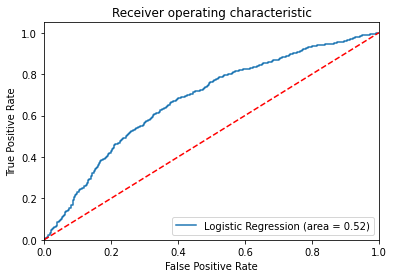

In [15]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [16]:
os = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
os_data_X, os_data_y=os.fit_resample(X_train, y_train)
logreg_SMOTE = LogisticRegression()
logreg_SMOTE.fit(os_data_X, os_data_y)

y_pred = logreg_SMOTE.predict(X_test)
print('Accuracy (Test): {:.2f}'.format(logreg_SMOTE.score(X_test, y_test)))
print(classification_report(y_test, y_pred))

Accuracy (Test): 0.65
              precision    recall  f1-score   support

           0       0.39      0.64      0.49       554
           1       0.83      0.65      0.73      1555

    accuracy                           0.65      2109
   macro avg       0.61      0.64      0.61      2109
weighted avg       0.72      0.65      0.67      2109



In [17]:
# redundant
# Recursive Feature Elimination (RFE) feature selection
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 20)
rfe = rfe.fit(os_data_X, os_data_y.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

[ True  True  True  True  True  True  True  True  True  True  True]
[1 1 1 1 1 1 1 1 1 1 1]


c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_features_to_select=20 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


In [4]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
k=0

path_k = "../Data/New Clusters/Cluster" + str(k)

df = pd.read_csv(path_k, delimiter=',')
df = df.iloc[:,2:] # drop original/new ids

X = df.iloc[:,:-1] # everything but last column
y = df.iloc[:,-1] #last column

scaler = StandardScaler()
scaled_features = scaler.fit_transform(X)
X = pd.DataFrame(scaled_features)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegressionCV()
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)
print('Accuracy (Test): {:.2f}'.format(logreg.score(X_test, y_test)))
print(classification_report(y_test, y_pred))

Accuracy (Test): 0.76
              precision    recall  f1-score   support

           0       0.64      0.19      0.29       554
           1       0.77      0.96      0.85      1555

    accuracy                           0.76      2109
   macro avg       0.70      0.58      0.57      2109
weighted avg       0.74      0.76      0.71      2109



In [20]:
# for cluster _
def log_k(k):
    path_k = "../Data/New Clusters/Cluster" + str(k)

    df = pd.read_csv(path_k, delimiter=',')
    df = df.iloc[:,2:] # drop original/new ids

    X = df.iloc[:,:-1] # everything but last column
    y = df.iloc[:,-1] #last column

    scaler = StandardScaler()
    scaled_features = scaler.fit_transform(X)
    X = pd.DataFrame(scaled_features)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
    logreg = LogisticRegression()
    logreg.fit(X_train, y_train)

    y_pred = logreg.predict(X_test)
    print('Accuracy (Test): {:.2f}'.format(logreg.score(X_test, y_test)))
    print(classification_report(y_test, y_pred))
    return logreg.score(X_test, y_test)

In [21]:
acc_list = []
for k in range(7):
    print(k)
    acc_list.append(log_k(k))
acc_list

0
Accuracy (Test): 0.76
              precision    recall  f1-score   support

           0       0.64      0.19      0.29       554
           1       0.77      0.96      0.85      1555

    accuracy                           0.76      2109
   macro avg       0.70      0.58      0.57      2109
weighted avg       0.74      0.76      0.71      2109

1
Accuracy (Test): 0.69
              precision    recall  f1-score   support

           0       0.67      0.72      0.70      2408
           1       0.71      0.65      0.68      2439

    accuracy                           0.69      4847
   macro avg       0.69      0.69      0.69      4847
weighted avg       0.69      0.69      0.69      4847

2
Accuracy (Test): 0.86
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        40
           1       0.86      1.00      0.93       247

    accuracy                           0.86       287
   macro avg       0.43      0.50      0.46       287
we

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

In [23]:
from statistics import mean
mean(acc_list)

0.7474210414159705

In [51]:
from sklearn.model_selection import GridSearchCV

hyperParams_grid = {'penalty': ["l1","elasticnet","l2"],
                  'tol': [1e-2, 1e-3, 1e-4, 1e-5], 'C': np.arange(0.5,2,0.2)}
 
grid = GridSearchCV(LogisticRegression(solver="saga"), hyperParams_grid, refit = True)
 
# Fit all permutations on training set
grid.fit(X_train, y_train)
print(grid.best_params_)
# {'C': 1.4000000000000001, 'penalty': 'l1', 'tol': 0.01}

grid_predictions = grid.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, grid_predictions))
print(classification_report(y_test, grid_predictions))

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py", line 1314, in fit
    raise ValueError("l1_ratio must be between 0 and 1;"
ValueError: l1_ratio must be between 0 and 1; got (l1_ratio=None)

  warnings.warn("Estimator fit failed. The score on this train-test"
c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition fo

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py", line 1314, in fit
    raise ValueError("l1_ratio must be between 0 and 1;"
ValueError: l1_ratio must be between 0 and 1; got (l1_ratio=None)

  warnings.warn("Est

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most rece

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most rece

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\users\user\appdata\lo

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most rece

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most rece

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most rece

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [0.68956522 0.68975845 0.68985507 0.68995169        nan        nan
        nan        nan 0.68956522 0.69014493 0.68975845 0.68975845
 0.68985507 0.68966184 0.68985507 0.68995169        nan        nan
        nan        nan 0.6894686  0.69004831 0.68985507 0.68995169
 0.69004831 0.68975845 0.68985507 0.68995169        nan        nan
    

{'C': 0.5, 'penalty': 'l2', 'tol': 0.001}
Accuracy: 0.6781609195402298
              precision    recall  f1-score   support

           0       0.64      0.74      0.68      2088
           1       0.73      0.62      0.67      2349

    accuracy                           0.68      4437
   macro avg       0.68      0.68      0.68      4437
weighted avg       0.69      0.68      0.68      4437



In [46]:
logreg = LogisticRegression(C=1.4, penalty= 'l1', tol= 0.01,solver="liblinear")
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)
print('Accuracy (Test): {:.2f}'.format(logreg.score(X_test, y_test)))
print(classification_report(y_test, y_pred))

Accuracy (Test): 0.68
              precision    recall  f1-score   support

           0       0.63      0.74      0.68      2088
           1       0.73      0.62      0.67      2349

    accuracy                           0.68      4437
   macro avg       0.68      0.68      0.68      4437
weighted avg       0.69      0.68      0.68      4437



In [39]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)
print('Accuracy (Test): {:.2f}'.format(logreg.score(X_test, y_test)))
print(classification_report(y_test, y_pred))

Accuracy (Test): 0.68
              precision    recall  f1-score   support

           0       0.64      0.74      0.69      2088
           1       0.73      0.62      0.67      2349

    accuracy                           0.68      4437
   macro avg       0.68      0.68      0.68      4437
weighted avg       0.69      0.68      0.68      4437



In [53]:
df = pd.read_csv('../Data/cardio_train.csv', delimiter=';')
df = df.iloc[:,2:] # drop original/new ids

X = df.iloc[:,:-1] # everything but last column
y = df.iloc[:,-1] #last column

scaler = StandardScaler()
scaled_features = scaler.fit_transform(X)
X = pd.DataFrame(scaled_features)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)
print('Accuracy (Test): {:.2f}'.format(logreg.score(X_test, y_test)))
print(classification_report(y_test, y_pred))

Accuracy (Test): 0.72
              precision    recall  f1-score   support

           0       0.69      0.79      0.74     10539
           1       0.75      0.65      0.70     10461

    accuracy                           0.72     21000
   macro avg       0.72      0.72      0.72     21000
weighted avg       0.72      0.72      0.72     21000

